In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
nw = pd.read_csv(r'C:\Users\vvinn\Downloads\winequality-red.csv')

Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [22]:
nw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [38]:
sw = pd.read_csv(r'C:\Users\vvinn\Downloads\stud.csv')
sw.columns

#while on deciding on the student's performance in exams majorly depands on the test_preparation_course

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [40]:
#first we generlize by doing the descriptive stats to understand the basic columns so,
sw.describe()
# from this we can conclude that the students scored more in reading_score and writing_score than the math itself and morever the std is around 15 only indiacating that the variability is moderate and also by seeing hte min is 0 can coonslude that some students even score 0 in te exams and the major concers in ata 25% of the data more than half of the students where not performing well

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


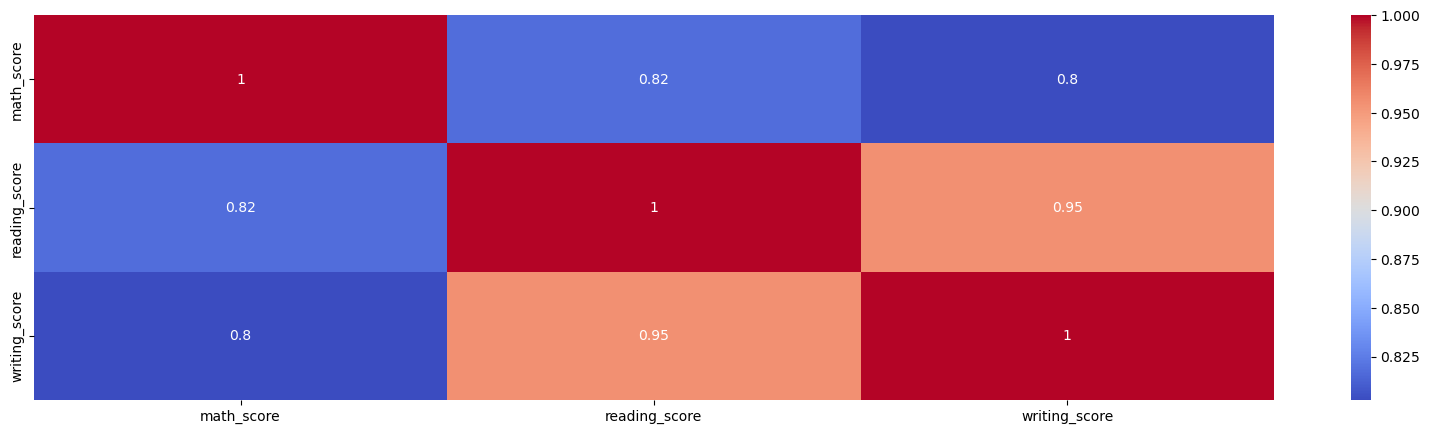

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#we perform the box plot to see the correlation of the each numeric values here

plt.figure(figsize=(20,5))
sns.heatmap(sw[['math_score','reading_score','writing_score']].corr(),annot=True,cmap = 'coolwarm')
plt.show()

In [48]:
#here we can observe that the there is more correlation between mathscore and reading_score

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distributionof each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [54]:
nw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
ni = nw.columns

In [62]:
ni

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

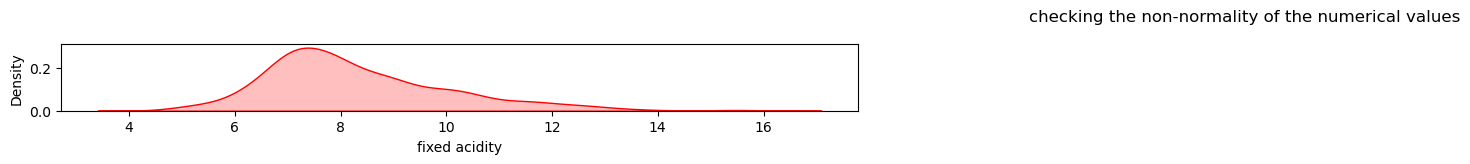

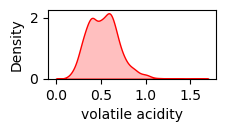

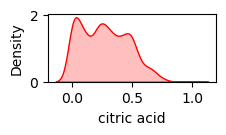

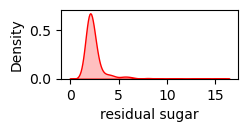

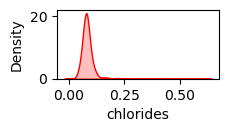

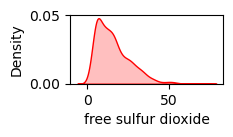

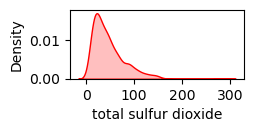

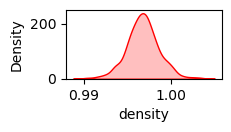

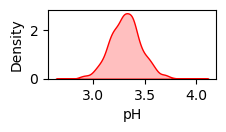

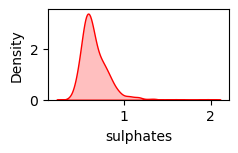

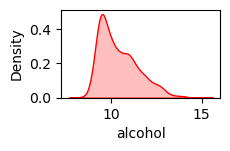

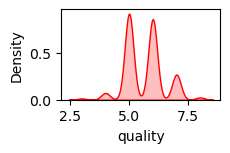

In [78]:
plt.figure(figsize = (25,5))
plt.suptitle('checking the non-normality of the numerical values',fontsize = 12)
for i in range(0,len(ni)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x = nw[ni[i]],fill=True,color='r')
    plt.xlabel(ni[i])
    plt.tight_layout()
    plt.show()

In [80]:
#there are other like log and normal transformation to change the skewnessa

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [103]:
from  sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [95]:
std = StandardScaler()
pc = PCA()
x = nw.drop(columns=['quality'])

In [107]:
new = std.fit_transform(x)
new_x = pc.fit_transform(new)
explained_variance = np.cumsum(pc.explained_variance_ratio_)
new_comp = argsmax(explained_variance >= 0.90)+1